# Taller

Siguiendo con el conjunto de datos *Wine*.

## Realice:

- Cargue el conjunto de datos *Wine*.
- Genere una partición estratificada 70-30 sobre el conjunto de datos.
- Genere una gráfica de barras en Pandas que verifique que las particiones de entrenamiento y prueba tengan la misma distribución de clases.

---

## Explorando la complejidad usando `KNearestNeighbor`

- Entrene un modelo `KNearestNeighbor`. Use los siguientes valores para evaluar la complejidad:
  - [1, 2, 3, ..., 20]
  - Grafique los errores de entrenamiento y generalización conforme la complejidad del modelo aumenta.

- Construya un conjunto de datos usando las características `Proline` contra `Flavonoids`.
  - Use la partición 70-30 definida al inicio.
  - Usando `KNearestNeighbor`, determine el número subóptimo de k-vecinos usando evaluación de la complejidad. Use los mismos valores de k: [1, 2, 3, ..., 20].
  - Grafique la superficie de decisión contra los ejemplos de test.
  - Reporte **accuracy**, el **error de clasificación**, la **precisión macro**, el **recall macro** y el **F1 score macro** sobre el conjunto de prueba.


# SOLUCIÓN

# 1. Importación de librerias

En este fragmento de código se importan todas las librerías necesarias para trabajar con el conjunto de datos Wine.
Se utilizan NumPy y Pandas para el manejo y análisis de los datos, mientras que Matplotlib.pyplot se emplea para generar las visualizaciones.
Desde scikit-learn (sklearn) se importan las herramientas necesarias para cargar el conjunto de datos, dividirlo en particiones de entrenamiento y prueba, entrenar el modelo K-Nearest Neighbors, y calcular las métricas de evaluación correspondientes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# 2. Cargar dataset

En esta sección del código se carga el conjunto de datos Wine utilizando la función load_wine del módulo sklearn.datasets.
Posteriormente, se separan las variables independientes (X_full), que contienen las características químicas de los vinos, y la variable dependiente (y_full), que representa la clase o tipo de vino.
Para lograrlo, se elimina la columna target del DataFrame original para conformar X_full, mientras que dicha columna se almacena por separado en y_full.

In [3]:
wine = load_wine(as_frame=True)
X_full = wine.frame.drop(columns=['target'])
y_full = wine.frame['target']
print("X")
print(X_full)
print("Y")
print(y_full)

X
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocy

# 3. Partición de los datos
En esta parte del código se realiza la partición del conjunto de datos en entrenamiento y prueba mediante la función train_test_split.
Se establece una proporción del 80% para entrenamiento y 20% para prueba (test_size=0.2).
Además, se utiliza el parámetro stratify=y_full para mantener una distribución equilibrada de las clases en ambas particiones, y se fija una semilla (random_state=42) con el fin de garantizar la reproducibilidad de los resultados.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

# 4. Distribución de clases

En esta parte del código se calcula la proporción de muestras por clase tanto en el conjunto de entrenamiento como en el de prueba utilizando value_counts(normalize=True).
Posteriormente, se construye un gráfico de barras comparativo con matplotlib para visualizar la distribución de clases en ambas particiones.

In [ ]:
train_counts = y_train.value_counts(normalize=True).sort_index()
test_counts = y_test.value_counts(normalize=True).sort_index()

fig1 = plt.figure()
ax = fig1.gca()
index = np.arange(len(train_counts))
bar_width = 0.35
ax.bar(index, train_counts.values, bar_width, label='Train')
ax.bar(index + bar_width, test_counts.values, bar_width, label='Test')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(train_counts.index.astype(str))
ax.set_xlabel('Clase'); ax.set_ylabel('Proporción')
ax.set_title('Distribución de clases')
ax.legend()
plt.show()

# 5. Escalado de datos

En esta parte del código se aplica una estandarización de los datos utilizando StandardScaler, con el objetivo de que todas las características tengan la misma escala y contribuyan de forma equitativa al modelo.
El escalador se ajusta únicamente con los datos del conjunto de entrenamiento, y posteriormente se utiliza para transformar tanto el conjunto de entrenamiento como el de prueba.
Como resultado, se generan las variables X_train_scaled y X_test_scaled, que contienen las versiones estandarizadas de los datos.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Evaluando K vecinos sobre modelo

En esta sección del código se entrena una serie de modelos K-Nearest Neighbors (KNN) variando el número de vecinos k en un rango de 1 a 20, utilizando los datos previamente estandarizados.
Para cada valor de k, se calcula el error de entrenamiento y el error de prueba mediante la expresión (1 - accuracy), y ambos resultados se almacenan en listas separadas con el propósito de analizarlos y compararlos posteriormente.

In [6]:
ks = list(range(1, 21))
train_errors, test_errors = [], []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_errors.append(1 - accuracy_score(y_train, knn.predict(X_train_scaled)))
    test_errors.append(1 - accuracy_score(y_test, knn.predict(X_test_scaled)))

# 7. Curvas de aprendizaje
En esta parte del código se grafican las curvas de error de entrenamiento y de generalización del modelo K-Nearest Neighbors, utilizando los valores de error obtenidos para distintos números de vecinos k (entre 1 y 20) con los datos previamente escalados.
A partir de la visualización, se identifica el punto donde el error de generalización alcanza su valor mínimo, que en este caso corresponde a k = 7, con un error aproximado de 0.000.

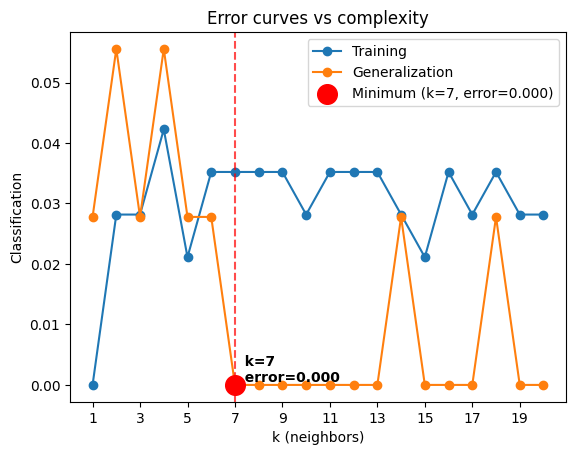

In [7]:
fig2 = plt.figure()
ax2 = fig2.gca()
ax2.plot(ks, train_errors, marker='o', label='Training')
ax2.plot(ks, test_errors, marker='o', label='Generalization')
ax2.set_xlabel('k (neighbors)'); ax2.set_ylabel('Classification')
ax2.set_title('Error curves vs complexity')
ax2.legend()

ax2.set_xticks(range(min(ks), max(ks)+1, 2))

min_test_error_idx = np.argmin(test_errors)
min_test_error_k = ks[min_test_error_idx]
min_test_error_value = test_errors[min_test_error_idx]

ax2.scatter(min_test_error_k, min_test_error_value, color='red', s=200, zorder=5,
           label=f'Minimum (k={min_test_error_k}, error={min_test_error_value:.3f})')

ax2.axvline(x=min_test_error_k, color='red', linestyle='--', alpha=0.7)

ax2.text(min_test_error_k, min_test_error_value,
        f'  k={min_test_error_k}\n  error={min_test_error_value:.3f}',
        verticalalignment='bottom', fontweight='bold')

ax2.legend()
plt.show()

# 8. Conjunto de datos (proline y flavoids)

En esta parte del código se seleccionan únicamente las características Proline y Flavanoids del conjunto de datos original, con el fin de construir un nuevo subconjunto bidimensional denominado X2.
Posteriormente, se realiza una partición estratificada 80-20 entre los conjuntos de entrenamiento y prueba, garantizando que la proporción de clases se mantenga equilibrada. Además, se utiliza el parámetro random_state=42 para asegurar la reproducibilidad de los resultados.

In [8]:
feat_x, feat_y = 'proline', 'flavanoids'
X2 = X_full[[feat_x, feat_y]]
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y_full, test_size=0.2, random_state=42, stratify=y_full
)

# 9. Escalado Proline y Flavanoids

En esta sección del código se aplica la estandarización a las características Proline y Flavanoids del nuevo conjunto de datos (X2).
Para ello, se utiliza StandardScaler, ajustándolo y transformando únicamente el conjunto de entrenamiento (X2_train) con el fin de evitar fugas de información.
Posteriormente, la misma transformación se aplica al conjunto de prueba (X2_test), garantizando que ambos conjuntos queden en la misma escala para el entrenamiento y evaluación del modelo.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled  = scaler2.transform(X2_test)

# 10. Evaluando K numero de vecinos

En esta parte del código se entrena una serie de modelos K-Nearest Neighbors (KNN) utilizando los valores de k comprendidos entre 1 y 20, tomando como base las características Proline y Flavanoids.
Para cada valor de k, se calcula el error de clasificación sobre el conjunto de prueba estandarizado (X2_test_scaled).

In [10]:
k_errors_2d = []
for k in ks:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X2_train_scaled, y2_train)
    y2_pred = knn2.predict(X2_test_scaled)
    k_errors_2d.append(1 - accuracy_score(y2_test, y2_pred))

k_opt = ks[int(np.argmin(k_errors_2d))]

knn2_final = KNeighborsClassifier(n_neighbors=k_opt)
knn2_final.fit(X2_train_scaled, y2_train)

KNeighborsClassifier(n_neighbors=4)

# 11. Superficie de decisión sobre TEST

En esta parte del código se genera y visualiza la superficie de decisión del modelo KNN entrenado con las características Proline y Flavanoids previamente estandarizadas. Para ello, se crea una malla de puntos que cubre el espacio de características, la cual se transforma con el mismo escalador utilizado en el entrenamiento. Luego, el modelo final se emplea para predecir la clase de cada punto en la malla y las predicciones se grafican como regiones de decisión en el plano. Finalmente, se superponen los puntos reales del conjunto de prueba (en sus unidades originales) para observar cómo el modelo separa visualmente las clases en el espacio bidimensional.

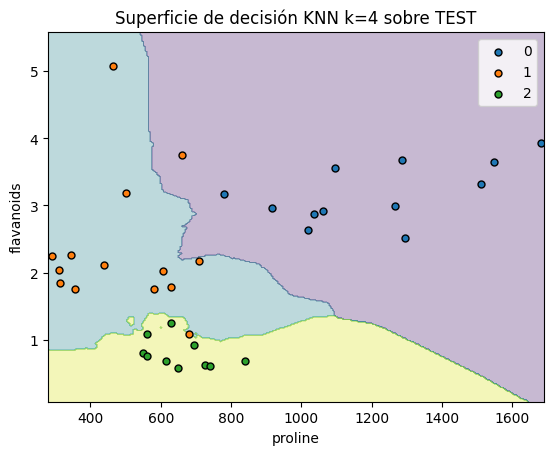

In [11]:
x_min, x_max = X2_test[feat_x].min() - 10, X2_test[feat_x].max() + 10
y_min, y_max = X2_test[feat_y].min() - 0.5, X2_test[feat_y].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]

grid_df = pd.DataFrame(grid, columns=[feat_x, feat_y])

grid_scaled = scaler2.transform(grid_df)

Z = knn2_final.predict(grid_scaled).reshape(xx.shape)

fig3 = plt.figure()
ax3 = fig3.gca()
ax3.contourf(xx, yy, Z, alpha=0.3)

for cls in sorted(y2_test.unique()):
    m = y2_test == cls
    ax3.scatter(
        X2_test.loc[m, feat_x],
        X2_test.loc[m, feat_y],
        label=cls,
        s=25, edgecolor='k'
    )

ax3.set_xlabel(feat_x); ax3.set_ylabel(feat_y)
ax3.set_title(f'Superficie de decisión KNN k={k_opt} sobre TEST')
ax3.legend()
plt.show()

# 12. Métricas sobre el conjunto de prueba

En esta sección del código se evalúa el rendimiento del modelo KNN entrenado con las características Proline y Flavanoids utilizando el conjunto de prueba estandarizado. Se calculan las principales métricas de desempeño, incluyendo la exactitud (accuracy), el error de clasificación, la precisión macro, el recall macro y el F1-score macro. Además, se genera un reporte de clasificación detallado que muestra el desempeño del modelo para cada una de las clases presentes en el conjunto de datos.

In [12]:
y2_pred_test = knn2_final.predict(X2_test_scaled)

acc = accuracy_score(y2_test, y2_pred_test)
prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(
    y2_test, y2_pred_test, average='macro', zero_division=0
)

print(f'k óptimo: {k_opt}')
print(f'Accuracy: {acc}')
print(f'Error de clasificación: {1-acc}')
print(f'Precisión (macro): {prec_macro}')
print(f'Recall (macro): {rec_macro}')
print(f'F1 (macro): {f1_macro}')
print(classification_report(y2_test, y2_pred_test, zero_division=0))

k óptimo: 4
Accuracy: 0.9722222222222222
Error de clasificación: 0.02777777777777779
Precisión (macro): 0.9743589743589745
Recall (macro): 0.9761904761904763
F1 (macro): 0.974320987654321
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

